<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/27.HR_Analysis_Should_I_take_this_job%3F_Will_I_be_satisfied_with_this_job%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

# Import necessary libraries
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set up Kaggle API credentials securely
os.environ['KAGGLE_USERNAME'] = "WanQi83"  # Ensure this is correct
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key"  # Replace with your actual key

# Initialize and authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Download the correct dataset (IBM HR Analytics Attrition dataset)
dataset_name = 'pavansubhasht/ibm-hr-analytics-attrition-dataset'
api.dataset_download_files(dataset_name, path='./', unzip=True)

In [ ]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
pd.set_option("display.max_columns", None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
original_cols = data.columns.tolist()
new_cols = ['JobSatisfaction', 'Attrition','Age','Gender','MaritalStatus','Over18','MonthlyIncome','MonthlyRate', 'HourlyRate',  'DailyRate','PercentSalaryHike','StockOptionLevel','WorkLifeBalance','EnvironmentSatisfaction','JobInvolvement','RelationshipSatisfaction','OverTime','JobLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','DistanceFromHome','BusinessTravel','JobRole','Department','PerformanceRating','TrainingTimesLastYear','NumCompaniesWorked','Education','EducationField','EmployeeCount','EmployeeNumber','StandardHours']
data = data[new_cols]

In [ ]:
data.head()

,JobSatisfaction,Attrition,Age,Gender,MaritalStatus,Over18,MonthlyIncome,MonthlyRate,HourlyRate,DailyRate,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,EnvironmentSatisfaction,JobInvolvement,RelationshipSatisfaction,OverTime,JobLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,BusinessTravel,JobRole,Department,PerformanceRating,TrainingTimesLastYear,NumCompaniesWorked,Education,EducationField,EmployeeCount,EmployeeNumber,StandardHours
0,4,Yes,41,Female,Single,Y,5993,19479,94,1102,11,0,1,2,3,1,Yes,2,8,6,4,0,5,1,Travel_Rarely,Sales Executive,Sales,3,0,8,2,Life Sciences,1,1,80
1,2,No,49,Male,Married,Y,5130,24907,61,279,23,1,3,3,2,4,No,2,10,10,7,1,7,8,Travel_Frequently,Research Scientist,Research & Development,4,3,1,1,Life Sciences,1,2,80
2,3,Yes,37,Male,Single,Y,2090,2396,92,1373,15,0,3,4,2,2,Yes,1,7,0,0,0,0,2,Travel_Rarely,Laboratory Technician,Research & Development,3,3,6,2,Other,1,4,80
3,3,No,33,Female,Married,Y,2909,23159,56,1392,11,0,3,4,3,3,Yes,1,8,8,7,3,0,3,Travel_Frequently,Research Scientist,Research & Development,3,3,1,4,Life Sciences,1,5,80
4,2,No,27,Male,Married,Y,3468,16632,40,591,12,1,3,1,3,4,No,1,6,2,2,2,2,2,Travel_Rarely,Laboratory Technician,Research & Development,3,3,9,1,Medical,1,7,80


Satisfaction
1    0.612925
0    0.387075
Name: proportion, dtype: float64


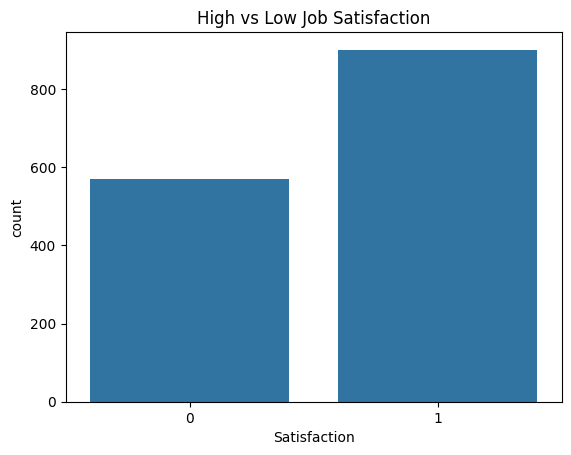

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Consider High = 3-4, Low = 1-2
data['Satisfaction'] = data['JobSatisfaction'].apply(lambda x: 1 if x >= 3 else 0)
print(data['Satisfaction'].value_counts(normalize=True))

sns.countplot(x='Satisfaction', data=data)
plt.title('High vs Low Job Satisfaction')
plt.show()

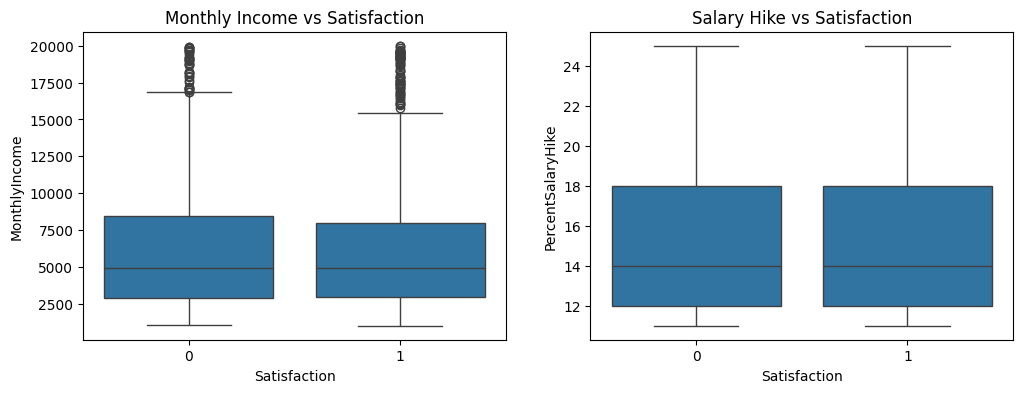

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='Satisfaction', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs Satisfaction')
plt.subplot(1,2,2)
sns.boxplot(x='Satisfaction', y='PercentSalaryHike', data=data)
plt.title('Salary Hike vs Satisfaction')
plt.show()

#Do higher-paid folks report more satisfaction? - Not

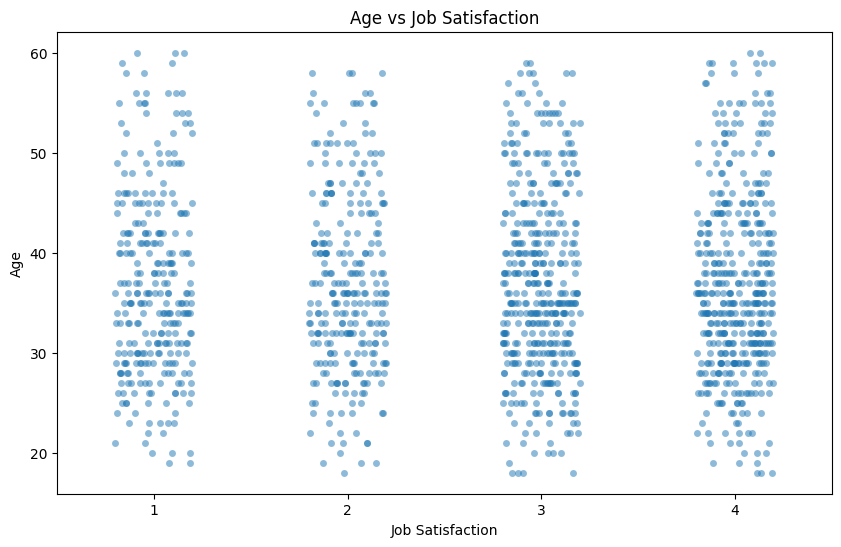

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='JobSatisfaction', y='Age', data=data, jitter=0.2, alpha=0.5)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Age')
plt.show()

# Age between 30-40 has the hghest satisfaction level

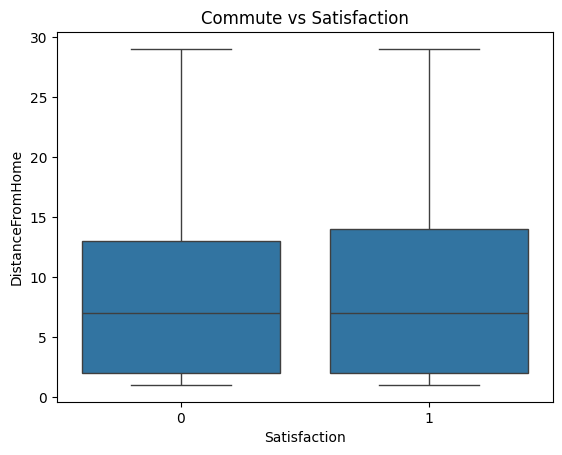

In [ ]:
sns.boxplot(x='Satisfaction', y='DistanceFromHome', data=data)
plt.title('Commute vs Satisfaction')
plt.show()

#Do those commute more report less satisfaction? - Not really

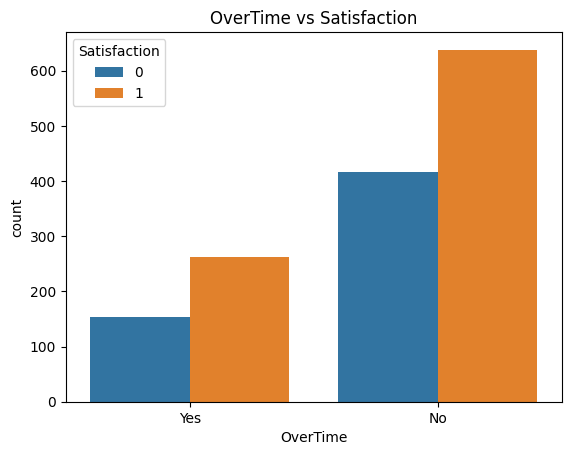

In [ ]:
sns.countplot(x='OverTime', hue='Satisfaction', data=data)
plt.title('OverTime vs Satisfaction')
plt.show()

# Does Overtime impact Job Satisfaction? - Yes, those who have less overtime has higher satisfaction

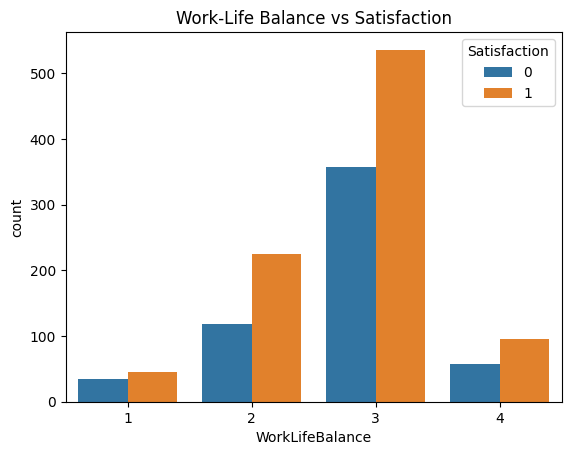

In [ ]:
sns.countplot(x='WorkLifeBalance', hue='Satisfaction', data=data)
plt.title('Work-Life Balance vs Satisfaction')
plt.show()

# Interesting insights, when the WLB exceeds 3, it seems that this factor does not really impact the job satisfaction anymore

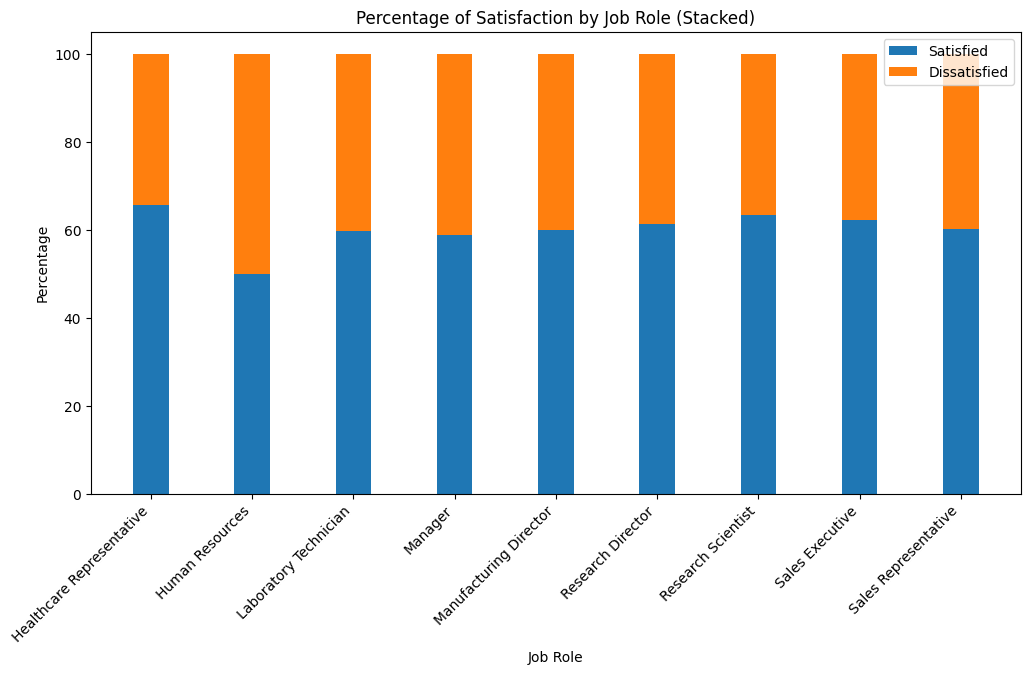

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

job_role_satisfaction = data.groupby(['JobRole', 'Satisfaction'])['Satisfaction'].count().reset_index(name='count')
job_role_total = data.groupby('JobRole')['Satisfaction'].count().reset_index(name='total')
job_role_satisfaction = pd.merge(job_role_satisfaction, job_role_total, on='JobRole')
job_role_satisfaction['percentage'] = (job_role_satisfaction['count'] / job_role_satisfaction['total']) * 100

satisfied = job_role_satisfaction[job_role_satisfaction['Satisfaction'] == 1]
dissatisfied = job_role_satisfaction[job_role_satisfaction['Satisfaction'] == 0]

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35

ax.bar(satisfied['JobRole'], satisfied['percentage'], width, label='Satisfied')
ax.bar(dissatisfied['JobRole'], dissatisfied['percentage'], width, bottom=satisfied['percentage'], label='Dissatisfied')

ax.set_ylabel('Percentage')
ax.set_xlabel('Job Role')
ax.set_title('Percentage of Satisfaction by Job Role (Stacked)')
ax.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

# Surprisingly, HR has the lowest Satisfaction Level, where other roles generally have 60% of the satisfaction

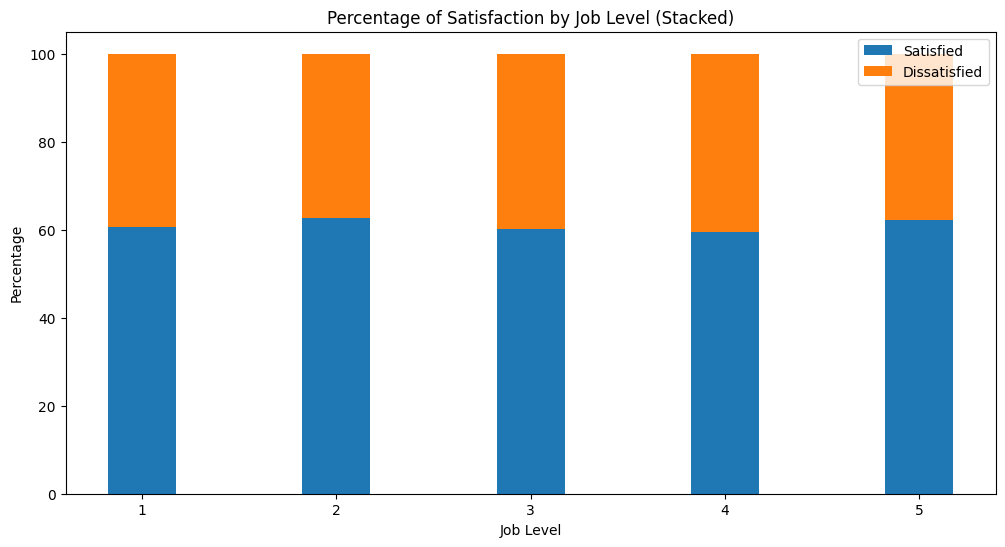

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

job_level_satisfaction = data.groupby(['JobLevel', 'Satisfaction'])['Satisfaction'].count().reset_index(name='count')
job_level_total = data.groupby('JobLevel')['Satisfaction'].count().reset_index(name='total')
job_level_satisfaction = pd.merge(job_level_satisfaction, job_level_total, on='JobLevel')
job_level_satisfaction['percentage'] = (job_level_satisfaction['count'] / job_level_satisfaction['total']) * 100

satisfied = job_level_satisfaction[job_level_satisfaction['Satisfaction'] == 1]
dissatisfied = job_level_satisfaction[job_level_satisfaction['Satisfaction'] == 0]

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Adjust width as needed

ax.bar(satisfied['JobLevel'], satisfied['percentage'], width, label='Satisfied')
ax.bar(dissatisfied['JobLevel'], dissatisfied['percentage'], width, bottom=satisfied['percentage'], label='Dissatisfied')

ax.set_ylabel('Percentage')
ax.set_xlabel('Job Level')
ax.set_title('Percentage of Satisfaction by Job Level (Stacked)')
ax.legend()

plt.show()

# There seems to be no difference in the Job Satisfaction though there's a difference in the Job Level

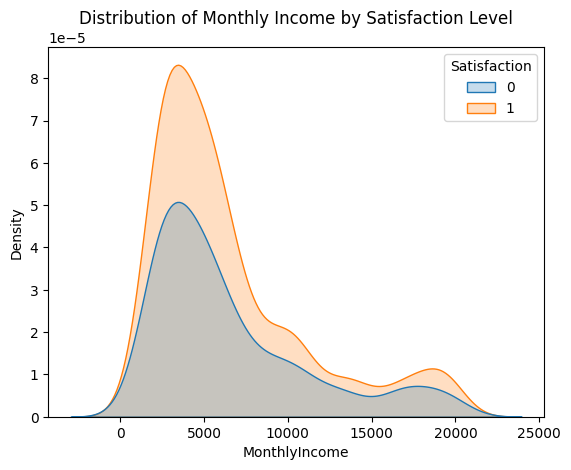

In [ ]:
sns.kdeplot(data=data, x='MonthlyIncome', hue='Satisfaction', fill=True)
plt.title('Distribution of Monthly Income by Satisfaction Level')
plt.show()

# Money only impacts Satisfaction up until a certain thresholdm approximate 4-5k range

### Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = data[['MonthlyIncome', 'DistanceFromHome', 'WorkLifeBalance', 'JobRole', 'Age']]
y = data['Satisfaction']
X = pd.get_dummies(X, columns=['JobRole'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rr_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rr_model.fit(X_train, y_train)
print("Accuracy:", rr_model.score(X_test, y_test))

Accuracy: 0.6156462585034014


### XGB Boost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
print("Accuracy:", xgb_model.score(X_test, y_test))

Accuracy: 0.5748299319727891


### Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
print("Accuracy:", lr_model.score(X_test, y_test))

Accuracy: 0.6190476190476191


In [ ]:
def predict_job_satisfaction():
    print("Answer these questions about your job offer:")
    age = int(input("How old are you?: "))
    salary = float(input("Desired monthly salary ($): "))
    commute = float(input("Commute distance (miles): "))
    worklife = int(input("Work-life balance vibe (1-4, 4=best): "))

    # Get all unique job roles from the original data
    job_roles = data['JobRole'].unique()

    # Display job role options
    print("\nPick your job role by number:")
    for i, role in enumerate(job_roles, 1):
        print(f"{i}. {role}")

    # Get user's job role choice
    while True:
        try:
            role_choice = int(input("Enter the number for your job role: ")) - 1
            if 0 <= role_choice < len(job_roles):
                role = job_roles[role_choice]
                break
            else:
                print("Invalid choice. Please enter a number between 1 and", len(job_roles))
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Create user input DataFrame
    user_input = pd.DataFrame({
        'Age': [age], 'MonthlyIncome': [salary], 'DistanceFromHome': [commute],
        'WorkLifeBalance': [worklife], 'JobRole': [role]
    })

    # One-hot encode JobRole
    user_input = pd.get_dummies(user_input, columns=['JobRole'], drop_first=True)

    # Align columns with training data
    for col in X.columns:
        if col not in user_input.columns:
            user_input[col] = 0
    user_input = user_input[X.columns]

    # Scale user input
    user_input_scaled = scaler.transform(user_input)

    # Predict
    pred = lr_model.predict(user_input_scaled)[0]
    prob = lr_model.predict_proba(user_input_scaled)[0][1]
    result = "Yes" if pred == 1 else "No"
    print(f"\nShould you take this job? {result}")
    print(f"Chance of high satisfaction: {prob:.2%}")
    if pred==1:
        print("Let's rock and roll!")
    else:
        print('Opps, this may not be a good fit, maybe next time!')

# Run it
predict_job_satisfaction()

Answer these questions about your job offer:
How old are you?: 27
Desired monthly salary ($): 8000
Commute distance (miles): 20
Work-life balance vibe (1-4, 4=best): 4

Pick your job role by number:
1. Sales Executive
2. Research Scientist
3. Laboratory Technician
4. Manufacturing Director
5. Healthcare Representative
6. Manager
7. Sales Representative
8. Research Director
9. Human Resources
Enter the number for your job role: 2

Should you take this job? Yes
Chance of high satisfaction: 59.98%
Let's rock and roll!
